In [10]:
import matplotlib.pyplot as plt
from razredi import Tocka
from jarvis_march import grid_peel_jarvis_enakomerna
from graham_scan import grid_peel_graham_enakomerna
import numpy as np

In [46]:
graham = grid_peel_graham_enakomerna(300,300)
#jarvis = grid_peel_jarvis_enakomerna(100,100)

In [47]:
print(graham[0])

1172


In [26]:
def narisi(rezultat_grid_peel):
    slovar_ovojnic = rezultat_grid_peel[1]
    for i in range(len(slovar_ovojnic)):
        seznam_x = []
        seznam_y = []
        for tocka in slovar_ovojnic[i]:
            seznam_x.append(tocka.x)
            seznam_y.append(tocka.y)
        seznam_x += [seznam_x[0]]
        seznam_y += [seznam_y[0]]
        plt.plot(seznam_x,seznam_y,"-o")

(-4.95, 103.95, -4.95, 103.95)

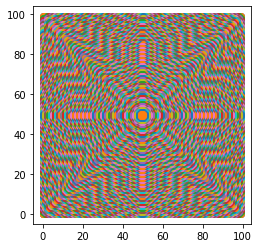

In [39]:
f = plt.figure()
narisi(jarvis)
narisi(graham)
plt.axis('square')

#f.savefig("11x11.png", bbox_inches='tight', dpi=600)

In [6]:
#ne poganjaj tega. traja ene 15 min
seznam = []
for i in range(150):
    ovojnice = grid_peel_graham_enakomerna(i,i)
    st_ovojnic = (i, len(ovojnice[1]))
    seznam.append(st_ovojnic)

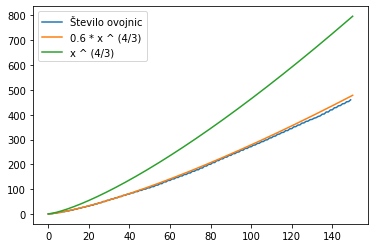

In [54]:
x = np.linspace(0,150,10000)
graf = plt.figure()
plt.plot(*zip(*seznam), label = "Število ovojnic")
plt.plot(x,0.6 * x **(4/3), label = "0.6 * x ^ (4/3)")
plt.plot(x,x **(4/3), label = "x ^ (4/3)")
plt.legend()

plt.savefig("st_ovojnic-z-n.jpg",bbox_inches='tight', dpi=600)